In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime, timezone


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

baseUrl = 'http://api.openweathermap.org/data/2.5/weather?appid='+api_key+'&units=metric&q='

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weatherData = []

chunkSize = 50

for i in range(0, len(cities)):
    for index, city in enumerate(cities[i*chunkSize:chunkSize*(i+1)]):
        print(f"Getting data for set {i} item {index} : {city}")
        try:
            response = requests.get(baseUrl + city)
            print(response.url)
            weatherData.append(response.json())
        except Exception as e:
            print("{}:{}".format(type(e), e))



Getting data for set 0 item 0 : rikitea
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=rikitea
Getting data for set 0 item 1 : sorvag
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=sorvag
Getting data for set 0 item 2 : mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mar%20del%20plata
Getting data for set 0 item 3 : dwarahat
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=dwarahat
Getting data for set 0 item 4 : lebu
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=lebu
Getting data for set 0 item 5 : karakendzha
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=karakendzha
Getting data for set 0 item 6 : cape town
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=iqaluit
Getting data for set 1 item 4 : riyadh
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=riyadh
Getting data for set 1 item 5 : attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=attawapiskat
Getting data for set 1 item 6 : vaini
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=vaini
Getting data for set 1 item 7 : burnie
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=burnie
Getting data for set 1 item 8 : illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=illoqqortoormiut
Getting data for set 1 item 9 : klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mangrol
Getting data for set 2 item 8 : babstovo
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=babstovo
Getting data for set 2 item 9 : pevek
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=pevek
Getting data for set 2 item 10 : beidao
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=beidao
Getting data for set 2 item 11 : east london
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=east%20london
Getting data for set 2 item 12 : kautokeino
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=kautokeino
Getting data for set 2 item 13 : torbay
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=skerries
Getting data for set 3 item 5 : moyamba
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=moyamba
Getting data for set 3 item 6 : machala
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=machala
Getting data for set 3 item 7 : ossora
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=ossora
Getting data for set 3 item 8 : faanui
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=faanui
Getting data for set 3 item 9 : mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mogadishu
Getting data for set 3 item 10 : busselton
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=b

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=porto%20walter
Getting data for set 4 item 6 : kaspiyskiy
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=kaspiyskiy
Getting data for set 4 item 7 : puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=puerto%20ayora
Getting data for set 4 item 8 : senanga
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=senanga
Getting data for set 4 item 9 : ratnagiri
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=ratnagiri
Getting data for set 4 item 10 : coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=coahuayana
Getting data for set 4 item 11 : pochutla
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c0

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=hassleholm
Getting data for set 5 item 7 : san quintin
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=san%20quintin
Getting data for set 5 item 8 : port hardy
<class 'requests.exceptions.ConnectionError'>:HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=port%20hardy (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001EA10713EB8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))
Getting data for set 5 item 9 : kiili
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&un

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=sakakah
Getting data for set 5 item 48 : komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=komsomolskiy
Getting data for set 5 item 49 : zephyrhills
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=zephyrhills
Getting data for set 6 item 0 : solenzo
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=solenzo
Getting data for set 6 item 1 : ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=ulladulla
Getting data for set 6 item 2 : mount pleasant
<class 'requests.exceptions.ConnectionError'>:HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mount%20pleasan

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=gomel
Getting data for set 6 item 49 : shetpe
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=shetpe
Getting data for set 7 item 0 : nouakchott
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=nouakchott
Getting data for set 7 item 1 : weiser
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=weiser
Getting data for set 7 item 2 : mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mnogovershinnyy
Getting data for set 7 item 3 : sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=sioux%20lookout
Getting data for set 7 item 4 : manggar
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc86

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=milkovo
Getting data for set 8 item 2 : stornoway
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=stornoway
Getting data for set 8 item 3 : aljezur
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=aljezur
Getting data for set 8 item 4 : chapais
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=chapais
Getting data for set 8 item 5 : rincon
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=rincon
Getting data for set 8 item 6 : shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=shenjiamen
Getting data for set 8 item 7 : ambatofinandrahana
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&u

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=rawannawi
Getting data for set 9 item 6 : luwuk
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=luwuk
Getting data for set 9 item 7 : aklavik
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=aklavik
Getting data for set 9 item 8 : xai-xai
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=xai-xai
Getting data for set 9 item 9 : havoysund
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=havoysund
Getting data for set 9 item 10 : zachagansk
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=zachagansk
Getting data for set 9 item 11 : sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=taybad
Getting data for set 10 item 10 : olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=olafsvik
Getting data for set 10 item 11 : hobyo
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=hobyo
Getting data for set 10 item 12 : cayenne
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=cayenne
Getting data for set 10 item 13 : poum
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=poum
Getting data for set 10 item 14 : duncan
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=duncan
Getting data for set 10 item 15 : port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metri

http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=mareeba
Getting data for set 11 item 14 : hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=hervey%20bay
Getting data for set 11 item 15 : ghotki
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=ghotki
Getting data for set 11 item 16 : axim
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=axim
Getting data for set 11 item 17 : marsa matruh
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=marsa%20matruh
Getting data for set 11 item 18 : fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad01b2c060bbc869598caccf1&units=metric&q=fort-shevchenko
Getting data for set 11 item 19 : kamenskoye
http://api.openweathermap.org/data/2.5/weather?appid=79eb77dad0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
df = pd.DataFrame(weatherData)
df.dropna(subset=['sys', 'wind', 'coord', 'main', 'clouds'], inplace=True)
df.head()

dateStamp = datetime.fromtimestamp(df.iloc[0]['dt']).strftime('%m/%d/%Y')


In [80]:
# verify we have enough data
df.shape

(529, 15)

In [81]:
def cleanDf (df):
    dfreturn = pd.DataFrame()
    dfreturn['Country'] = df['sys'].map(lambda x: x['country'])
    dfreturn['Wind'] = df['wind'].map(lambda x: x['speed'])
    dfreturn['Lat'] = df['coord'].map(lambda x: x['lat'])
    dfreturn['Max Temp'] = df['main'].map(lambda x: x['temp_max'])
    dfreturn['Cloudiness'] = df['clouds'].map(lambda x: x['all'])
    dfreturn['Humidity'] = df['main'].map(lambda x: x['humidity'])

    return dfreturn[['Country', 'Lat', 'Max Temp', 'Wind', 'Cloudiness', 'Humidity']]

In [82]:
plotData = cleanDf(df)
plotData.head()


,Country,Lat,Max Temp,Wind,Cloudiness,Humidity
0,PF,-23.12,26.23,7.39,92,100
2,AR,-46.43,19.71,11.39,32,41
3,IN,29.78,1.73,0.89,0,86
4,ET,8.96,11.11,1.44,36,93
6,ZA,-33.93,22.22,9.30,0,68


In [83]:
plotData.to_csv("citydata.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

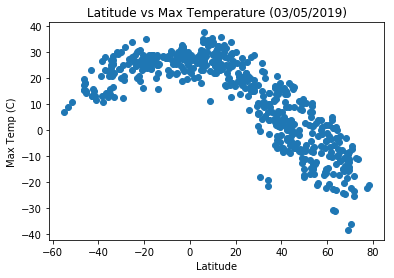

In [84]:
plt.scatter(plotData['Lat'],plotData['Max Temp'])
plt.title(f"Latitude vs Max Temperature ({dateStamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.savefig("./temp.png")
plt.show()


#### Latitude vs. Humidity Plot

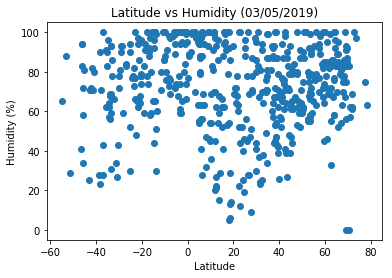

In [85]:
plt.scatter(plotData['Lat'],plotData['Humidity'])
plt.title(f"Latitude vs Humidity ({dateStamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

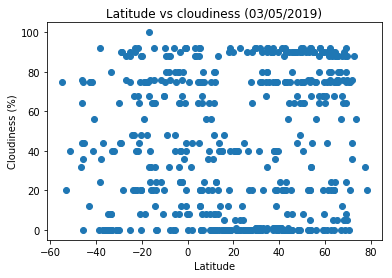

In [86]:
plt.scatter(plotData['Lat'],plotData['Cloudiness'])
plt.title(f"Latitude vs cloudiness ({dateStamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./cloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

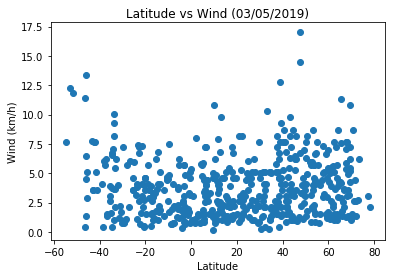

In [87]:
plt.scatter(plotData['Lat'],plotData['Wind'])
plt.title(f"Latitude vs Wind ({dateStamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind (km/h)")
plt.savefig("./wind.png")
plt.show()


## Analysis
- As expected, there is a strong correlation between latitude and maximum daily temperature. The closer the city is to the equador (latitude = 0) the higher the temperature. 
- Cities in the southern hemisphere (latitude < 0) seem to be hotter than cities in the northern hamisphere
- There is no strong correlation between latitude and wind, humidity or cloudiness